# Stephen Lennox

## Research question/interests
### **What is the best place to live in provincial capital cities based the housing index of the last year?**

I am very interested in the current housing markets in Canada. I am currently enrolled in the co-op program and due to a general lack of success on my remote/local job hunt, I am forced to look outside of the province at on-site positions to fufill my co-op graduation requirements. That means that in other provinces like Alberta, Quebec and Ontario: I need to know what the status of housing is and where in order to make informed financial choices on where I potentially move to. My research question is: **What is the best place to live in provincial capital cities based the housing index of the last year?**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
df_index= pd.read_csv("../data/raw/Montly Data/Montly-index.csv")
df_quality = pd.read_csv("../data/raw/Quality Long-Form Data/Housing-quality.csv")

In [3]:
data_explore1=df_index.drop(columns=["DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "COORDINATE"])
data_explore1=data_explore1.dropna(subset="VALUE")
data_explore1

,REF_DATE,GEO,New housing price indexes,SCALAR_ID,VECTOR,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,Total (house and land),0,v111955442,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,House only,0,v111955443,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,Land only,0,v111955444,40.6,E,NaN,NaN,1
9,1981-01,"St. John's, Newfoundland and Labrador",Total (house and land),0,v111955451,36.1,NaN,NaN,NaN,1
10,1981-01,"St. John's, Newfoundland and Labrador",House only,0,v111955452,37.5,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
60475,2022-12,"Vancouver, British Columbia",House only,0,v111955557,126.8,NaN,NaN,NaN,1
60476,2022-12,"Vancouver, British Columbia",Land only,0,v111955558,121.4,E,NaN,NaN,1
60477,2022-12,"Victoria, British Columbia",Total (house and land),0,v111955559,125.0,NaN,NaN,NaN,1
60478,2022-12,"Victoria, British Columbia",House only,0,v111955560,131.9,NaN,NaN,NaN,1


### Get all of the major capital cities' data

In [4]:
FSJ=data_explore1[data_explore1["GEO"].str.contains("St. John's")]
REG=data_explore1[data_explore1["GEO"].str.contains("Regina")]
HAL=data_explore1[data_explore1["GEO"].str.contains("Halifax")]
QBC=data_explore1[data_explore1["GEO"].str.contains("Quebec")]
VIC=data_explore1[data_explore1["GEO"].str.contains("Victoria")]
EDM=data_explore1[data_explore1["GEO"].str.contains("Edmonton")]
OTW=data_explore1[data_explore1["GEO"].str.contains("Ottawa")]

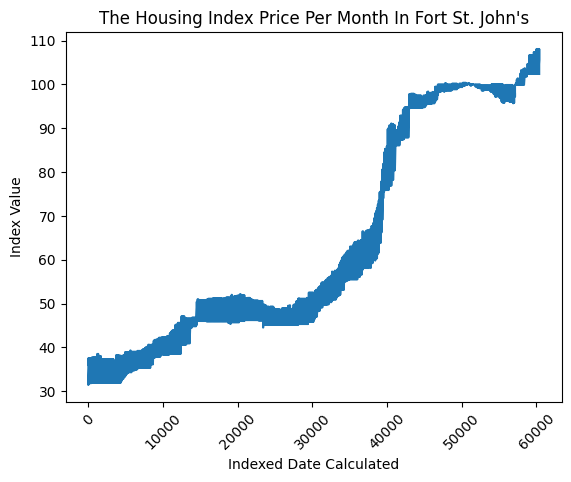

In [95]:
plt_FSJ=sns.lineplot(FSJ, x=FSJ.index, y="VALUE")
plt_FSJ.set(ylabel="Index Value", xlabel="Indexed Date Calculated", title="The Housing Index Price Per Month In Fort St. John's")
#plt_REG=sns.lineplot(REG, x="REF_DATE", y="VALUE")
#plt_HAL=sns.lineplot(HAL, x="REF_DATE", y="VALUE")
#plt_QBC=sns.lineplot(QBC, x="REF_DATE", y="VALUE")
#plt_VIC=sns.lineplot(VIC, x="REF_DATE", y="VALUE")
#plt_EDM=sns.lineplot(EDM, x="REF_DATE", y="VALUE")
plt_FSJ.tick_params(axis='x', rotation=45, which='major')

### Exploratory Data from the last 12 months

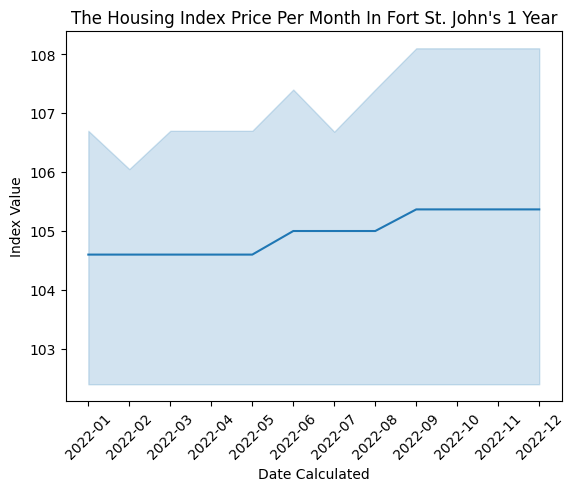

In [6]:
year_FSJ=FSJ.tail(36)
plt_FSJ=sns.lineplot(year_FSJ, x="REF_DATE", y="VALUE")
plt_FSJ.set(ylabel="Index Value", xlabel="Date Calculated", title="The Housing Index Price Per Month In Fort St. John's 1 Year")
plt_FSJ.tick_params(axis='x', rotation=45, which='major')

### Explore the second dataset

[Text(0.5, 1.0, 'Non-response rate per area'),
 Text(0, 0.5, 'Non-response rate'),
 Text(0.5, 0, 'Location')]

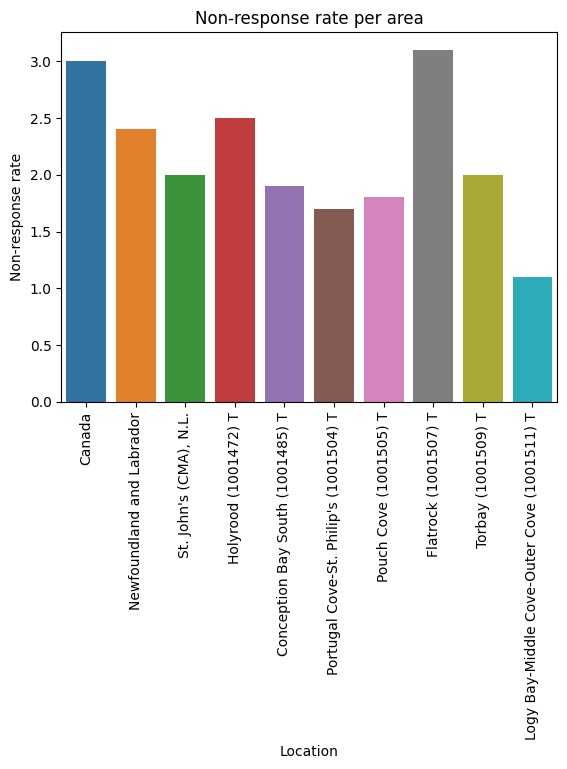

In [83]:
data_explore2 =df_quality.drop(columns=["DGUID", "Symbol.17", "Symbol.16", "Symbol.18", "Symbol.19", "Symbol.15", "Symbol.14", "Symbol.13", "Symbol.12", "Symbol.11", "Symbol.10", "Symbol.9", "Symbol.8", "Symbol.7", "Symbol.6", "Symbol.5", "Symbol.4", "Symbol.3", "Symbol.2", "Symbol.1", "Symbol"])
colnames= [item for item in data_explore2.columns if "Non-response rate" in item]
colnames.append("GEO")
data_explore2["GEO"]
filtered=data_explore2[colnames]
plt_quality=sns.barplot(filtered.iloc[:10], y="Long-form data quality indicators – Housing characteristics (20):Tenure - Non-response rate[1]",x= "GEO")
plt_quality.tick_params(axis='x', rotation=90, which='major')
plt_quality.set(title="Non-response rate per area", ylabel='Non-response rate', xlabel='Location')